# Load libraries 

In [20]:
#load libraries 
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
#import ROOT
#from ROOT import TFile

import root_pandas
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


Welcome to JupyROOT 6.23/01


# Load tuple files
The following will automatically download the files from https://userweb.jlab.org/~spaul/sidis_tuple_examples, if they are not already downloaded.  

In [39]:
import urllib.request, os

for filename in "example_mc.root", "example_data.root":
    if not (name in os.listdir(".")):
        url = 'https://userweb.jlab.org/~spaul/sidis_tuples_examples/' +filename
        urllib.request.urlretrieve(url, filename)

Now load the tuples from the files.

In [40]:
#electrons: events with at least one electron which passes DIS event selection cuts
#hadrons: events with at least one electron (passing cuts above) and at least one charged hadron
#dihadrons: events with at least one electron and two charged hadrons, one of which is a "leading" pion, (ie, z>0.5)

data_electrons = root_pandas.read_root("example_data.root", "electrons")
data_hadrons = root_pandas.read_root("example_data.root", "hadrons")
data_dihadrons = root_pandas.read_root("example_data.root", "dihadrons")

#same for Monte-Carlo simulations
mc_electrons = root_pandas.read_root("example_mc.root", "electrons")
mc_hadrons = root_pandas.read_root("example_mc.root", "hadrons")
mc_dihadrons = root_pandas.read_root("example_mc.root", "dihadrons")

In [25]:
#print the number of entries in each tuple
print("data electrons\tlength =", len(data_electrons))
print("data hadrons\tlength =", len(data_hadrons))
print("data dihadrons\tlength =", len(data_dihadrons))
print("")
print("mc electrons\tlength =", len(mc_electrons))
print("mc hadrons\tlength =", len(mc_hadrons))
print("mc dihadrons\tlength =", len(mc_dihadrons))

data electrons	length = 555358
data hadrons	length = 316303
data dihadrons	length = 6184

mc electrons	length = 171105
mc hadrons	length = 153851
mc dihadrons	length = 5486


In [26]:
#print the list of variables in each tuple (these are the same for data and monte-carlo)
for df, name in (data_electrons,"electrons"), (data_hadrons,"hadrons"), (data_dihadrons,"dihadrons"):
    print(name + ":")
    print(df.columns)
    print("\n")


electrons:
Index(['E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nelectrons', 'nu', 'Q2', 'x',
       'y', 'W', 'e_DC1x', 'e_DC2x', 'e_DC3x', 'e_DC1y', 'e_DC2y', 'e_DC3y',
       'e_PCALx', 'e_PCALy', 'e_ecalfrac', 'e_pcal', 'e_vz', 'npip', 'npim',
       'npp', 'npm', 'nKp', 'nKm', 'nh', 'z_tot'],
      dtype='object')


hadrons:
Index(['nelectrons', 'E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x',
       'y', 'W', 'h_chi2pid', 'h_pid', 'h_p', 'h_th', 'h_ph', 'h_DC1x',
       'h_DC1y', 'h_DC2x', 'h_DC2y', 'h_DC3x', 'h_DC3y', 'dvz', 'z', 'h_cm_p',
       'h_cm_th', 'h_cm_ph', 'h_eta', 'dtime', 'dtime_corr'],
      dtype='object')


dihadrons:
Index(['E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x', 'y', 'W',
       'h1_chi2pid', 'h2_chi2pid', 'h1_pid', 'h2_pid', 'h1_p', 'h2_p', 'h1_th',
       'h2_th', 'h1_ph', 'h2_ph', 'h1_z', 'h2_z', 'h1_eta', 'h2_eta',
       'h1_cm_p', 'h2_cm_p', 'h1_cm_th', 'h2_cm_th', 'h1_cm_ph', 'h2_cm_ph',
       'pair_mass', 'diff_eta', 'diff_phi', 'n

# Plots for the electrons tuple

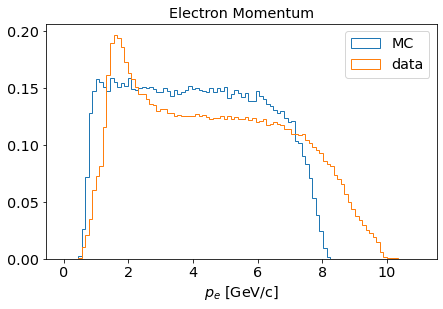

In [27]:
# plot momenta of measured and simulated electrons
# (e_p is an abbreviation for "electron momentum")
plt.hist(mc_electrons.e_p,bins=100, range=(0,11),histtype='step',density=True,label="MC")
plt.hist(data_electrons.e_p,bins=100, range=(0,11),histtype='step',density=True,label="data")
plt.gca().set_xlabel("$p_{e}$ [GeV/c]")
plt.gca().set_title("Electron Momentum")
plt.gca().legend()
plt.show()

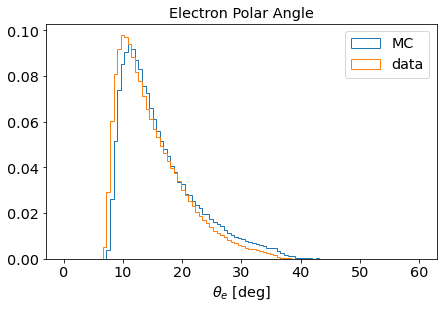

In [28]:
# plot polar angle of measured and simulated electrons
# (e_th is an abbreviation for "electron theta")
plt.hist(mc_electrons.e_th*180/np.pi,bins=100, range=(0,60),histtype='step',density=True,label="MC")
plt.hist(data_electrons.e_th*180/np.pi,bins=100, range=(0,60),histtype='step',density=True,label='data')
plt.gca().set_xlabel("$\\theta_{e}$ [deg]")
plt.gca().set_title("Electron Polar Angle")
plt.gca().legend()
plt.show()

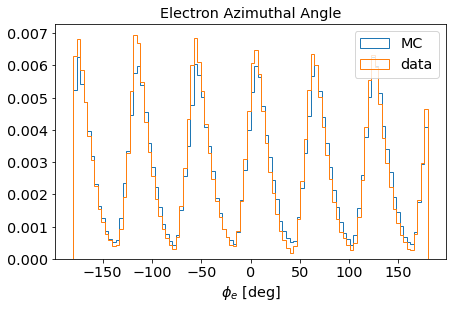

In [29]:
#plot azimuthal angle of measured and simulated electrons
# (e_ph is an abbreviation for "electron momentum")
plt.hist(mc_electrons.e_ph*180/np.pi,bins=100, range=(-180,180),histtype='step',density=True,label="MC")
plt.hist(data_electrons.e_ph*180/np.pi,bins=100, range=(-180,180),histtype='step',density=True,label='data')
plt.gca().set_xlabel("$\\phi_e$ [deg]")
plt.gca().set_title("Electron Azimuthal Angle")
plt.gca().legend()
plt.show()

# Plots for the hadron tuple

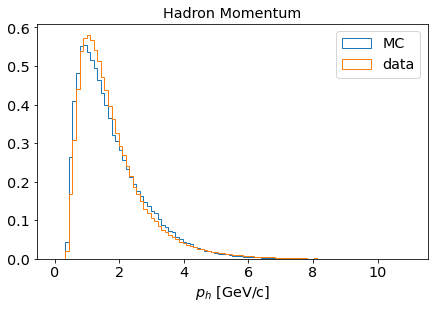

In [30]:
# plot momenta of measured and simulated hadrons
# (h_p is an abbreviation for "hadron momentum")
plt.hist(mc_hadrons.h_p,bins=100, range=(0,11),histtype='step',density=True,label="MC")
plt.hist(data_hadrons.h_p,bins=100, range=(0,11),histtype='step',density=True,label="data")
plt.gca().set_xlabel("$p_{h}$ [GeV/c]")
plt.gca().set_title("Hadron Momentum")
plt.gca().legend()
plt.show()

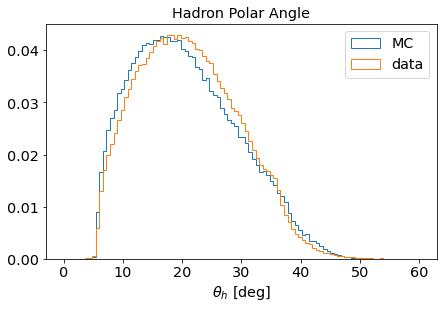

In [31]:
# plot polar angle of measured and simulated hadrons
# (h_th is an abbreviation for "hadron theta")
plt.hist(mc_hadrons.h_th*180/np.pi,bins=100, range=(0,60),histtype='step',density=True,label="MC")
plt.hist(data_hadrons.h_th*180/np.pi,bins=100, range=(0,60),histtype='step',density=True,label='data')
plt.gca().set_xlabel("$\\theta_{h}$ [deg]")
plt.gca().set_title("Hadron Polar Angle")
plt.gca().legend()
plt.show()

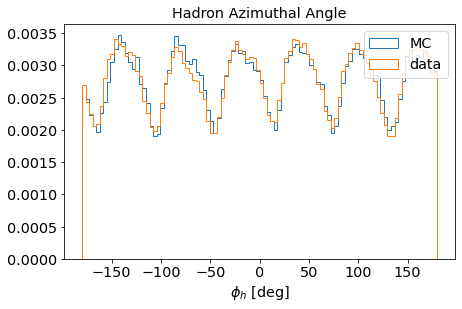

In [32]:
# plot azimuthal angle of measured and simulated hadrons
# (h_ph is an abbreviation for "hadron momentum")
plt.hist(mc_hadrons.h_ph*180/np.pi,bins=100, range=(-180,180),histtype='step',density=True,label="MC")
plt.hist(data_hadrons.h_ph*180/np.pi,bins=100, range=(-180,180),histtype='step',density=True,label='data')
plt.gca().set_xlabel("$\\phi_{h}$ [deg]")
plt.gca().set_title("Hadron Azimuthal Angle")
plt.gca().legend()
plt.show()

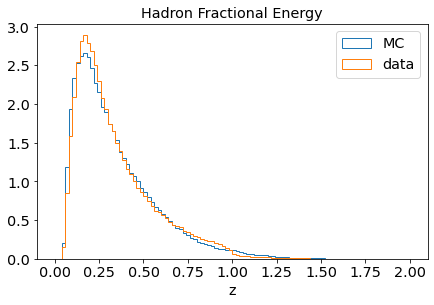

In [33]:
# plot fractional energy z of measured and simulated hadrons
# z = (hadron energy)/(beam energy - electron energy)
plt.hist(mc_hadrons.z,bins=100, range=(0,2),histtype='step',density=True,label="MC")
plt.hist(data_hadrons.z,bins=100, range=(0,2),histtype='step',density=True,label="data")
plt.gca().set_xlabel("z")
plt.gca().set_title("Hadron Fractional Energy")
plt.gca().legend()
plt.show()

# Plots for the dihadron tuple

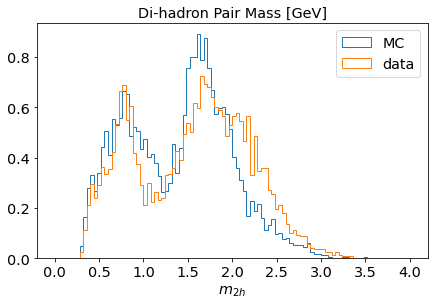

In [34]:
# plot momenta of measured and simulated di-pion pair mass
plt.hist(mc_dihadrons.pair_mass,bins=100, range=(0,4),histtype='step',density=True,label="MC")
plt.hist(data_dihadrons.pair_mass,bins=100, range=(0,4),histtype='step',density=True,label="data")
plt.gca().set_xlabel("$m_{2h}$")
plt.gca().set_title("Di-hadron Pair Mass [GeV]")
plt.gca().legend()
plt.show()

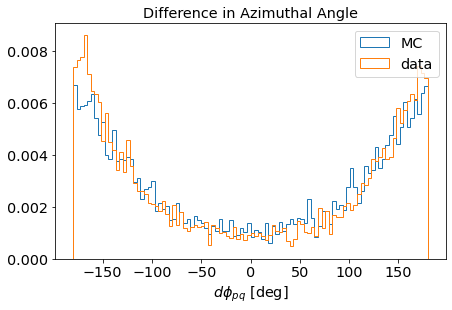

In [35]:
# plot the difference in azimuthal angle between the two hadrons (in virtual photon coordinate system)
plt.hist(mc_dihadrons.diff_phi_cm*180/np.pi,bins=100, range=(-180,180),histtype='step',density=True,label="MC")
plt.hist(data_dihadrons.diff_phi_cm*180/np.pi,bins=100, range=(-180,180),histtype='step',density=True,label="data")
plt.gca().set_xlabel("$d\\phi_{pq}$ [deg]")
plt.gca().set_title("Difference in Azimuthal Angle")
plt.gca().legend()
plt.show()

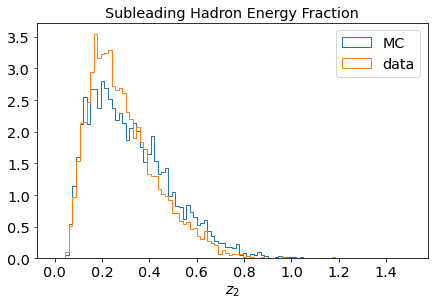

In [36]:
# plot the energy fraction of the subleading hadron
plt.hist(mc_dihadrons.h2_z,bins=100, range=(0,1.5),histtype='step',density=True,label="MC")
plt.hist(data_dihadrons.h2_z,bins=100, range=(0,1.5),histtype='step',density=True,label="data")
plt.gca().set_xlabel("$z_2$")
plt.gca().set_title("Subleading Hadron Energy Fraction")
plt.gca().legend()
plt.show()

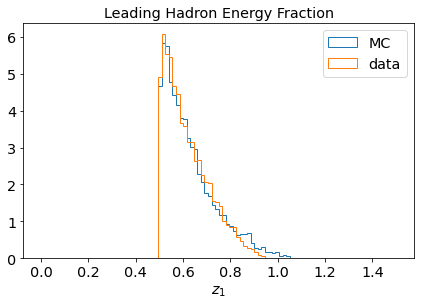

In [37]:
# plot the energy fraction of the leading hadron
plt.hist(mc_dihadrons.h1_z,bins=100, range=(0,1.5),histtype='step',density=True,label="MC")
plt.hist(data_dihadrons.h1_z,bins=100, range=(0,1.5),histtype='step',density=True,label="data")
plt.gca().set_xlabel("$z_1$")
plt.gca().set_title("Leading Hadron Energy Fraction")
plt.gca().legend()
plt.show()